In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

# First Step: Let's Create the mock the Dataset

In [146]:
#Create the dataset
# Set seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate mock data
data = {
    "PatientID": np.arange(1, n_samples + 1),
    "Group": np.random.choice([0, 1], size=n_samples),  # 0 for control, 1 for experimental
    "Age": np.random.randint(18, 90, size=n_samples),
    "Gender": np.random.choice(["Male", "Female"], size=n_samples),
    "BMI": np.round(np.random.uniform(18.5, 40, size=n_samples), 1),
    "BloodPressure": np.round(np.random.uniform(90, 180, size=n_samples), 1),
    "Cholesterol": np.round(np.random.uniform(100, 300, size=n_samples), 1),
    "Glucose": np.round(np.random.uniform(70, 200, size=n_samples), 1),
    "SmokingStatus": np.random.choice(["Never", "Former", "Current"], size=n_samples),
    "PhysicalActivity": np.random.choice(["Low", "Moderate", "High"], size=n_samples),
    "Comorbidities": np.random.randint(0, 5, size=n_samples),
    "Medications": np.random.choice([0, 1], size=n_samples), # 0 for No Medication, 1 for Taking Some Medication
    "FollowUpTime": np.round(np.random.uniform(1, 60, size=n_samples), 1), #in months
    "Outcome": np.random.choice([0, 1], size=n_samples), # 0 for Censored, 1 for Event Occurred
    "Education": np.random.choice(["High School", "Bachelor", "Master", "PhD"], size=n_samples),
    "RaceEthnicity": np.random.choice(["White", "Black", "Hispanic", "Asian", "Other"], size=n_samples),
    "Income": np.random.choice(["<30K", "30-60K", "60-100K", ">100K"], size=n_samples),
    "MaritalStatus": np.random.choice(["Single", "Married", "Divorced", "Widowed"], size=n_samples),
    "EmploymentStatus": np.random.choice(["Employed", "Unemployed", "Retired"], size=n_samples),
}

# Create DataFrame
mock_data = pd.DataFrame(data)
mock_data.head(10)

,PatientID,Group,Age,Gender,BMI,BloodPressure,Cholesterol,Glucose,SmokingStatus,PhysicalActivity,Comorbidities,Medications,FollowUpTime,Outcome,Education,RaceEthnicity,Income,MaritalStatus,EmploymentStatus
0,1,0,80,Male,37.9,165.4,129.5,95.3,Never,High,2,0,18.5,1,Bachelor,Hispanic,60-100K,Divorced,Employed
1,2,1,49,Female,37.3,175.0,165.6,77.5,Current,High,2,1,10.6,0,Bachelor,Black,>100K,Married,Retired
2,3,0,50,Male,31.3,151.5,186.8,114.5,Never,Low,3,0,40.9,0,High School,Black,>100K,Divorced,Employed
3,4,0,84,Male,31.4,134.7,117.7,105.1,Never,Low,0,0,3.2,1,High School,Other,>100K,Single,Employed
4,5,0,35,Female,32.8,145.6,144.1,195.6,Current,High,2,1,37.6,1,Master,Black,<30K,Widowed,Retired
5,6,1,42,Male,22.3,168.2,219.6,142.5,Former,Moderate,4,1,42.2,0,Bachelor,Black,<30K,Widowed,Retired
6,7,0,71,Male,38.2,141.4,247.1,115.1,Current,Low,4,1,13.7,0,Master,White,<30K,Single,Unemployed
7,8,0,75,Male,27.5,92.7,299.7,145.5,Current,Moderate,3,0,3.5,0,Master,Other,60-100K,Divorced,Unemployed
8,9,0,84,Male,26.7,173.8,286.6,88.1,Current,Low,0,1,22.5,1,High School,Other,<30K,Divorced,Unemployed
9,10,1,63,Female,29.7,152.1,228.5,127.7,Former,Low,0,1,6.8,0,PhD,Black,<30K,Single,Unemployed


# Second Step: Let's Explore the Dataset

## Descriptive Stats

In [148]:
#Descriptive Stats of numerical vars
df_describe = mock_data.describe().round(2).drop(columns = ["PatientID","Group","Outcome","Medications", "Comorbidities"])
df_describe = df_describe.reset_index().drop(index=0).set_index("index")
df_describe.index.name=None
df_describe.head(10)

,Age,BMI,BloodPressure,Cholesterol,Glucose,FollowUpTime
mean,52.84,29.47,135.41,198.67,135.12,29.19
std,20.89,6.40,25.69,57.29,38.28,17.27
min,18.00,18.60,90.30,100.30,70.00,1.10
25%,34.00,23.60,113.05,151.85,103.42,14.38
50%,52.00,29.70,136.80,197.50,134.65,28.55
75%,72.00,35.02,156.65,246.50,169.42,44.20
max,89.00,40.00,179.90,299.70,199.70,59.70


## Demographics

In [149]:
#Demographic Information
# Age	Gender	Education	RaceEthnicity	Income	MaritalStatus	EmploymentStatus SmokingStatus	PhysicalActivity	Comorbidities

df_hold = mock_data[['Age', 'Gender', 'Education', 'RaceEthnicity', 'Income', 'MaritalStatus', 'EmploymentStatus','SmokingStatus', 'PhysicalActivity', 'Comorbidities']]

# Define the bins and labels for age groups
bins = [-float('inf'), 17, 24, 34, 44, 54, 64, float('inf')]
labels = ['Under 18', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 or older']

# Create a copy of the DataFrame to avoid the warning
dem = df_hold.copy()

# Create a new column 'AgeGroup' with categorized age groups
dem.loc[:, 'AgeGroup'] = pd.cut(dem['Age'], bins=bins, labels=labels, right=True)

# Create a demographic table with counts for each category
demographic_counts = {
    'Variable': [],
    'Category': [],
    'Count': []
}

# Define a list of columns to include in the table
columns = ['AgeGroup', 'Gender', 'Education', 'RaceEthnicity', 'Income', 'MaritalStatus', 'EmploymentStatus', 'SmokingStatus', 'PhysicalActivity', 'Comorbidities']

# Create a demographic table with counts for each category
demographic_counts = {
    'Variable': [],
    'Category': [],
    'N': [],
}

# Define a list of columns to include in the table
columns = ['AgeGroup', 'Gender', 'Education', 'RaceEthnicity', 'Income', 'MaritalStatus', 'EmploymentStatus', 'SmokingStatus', 'PhysicalActivity', 'Comorbidities']

# Calculate counts for each variable and its categories
for column in columns:
    counts = dem[column].value_counts()
    for category, count in counts.items():
        demographic_counts['Variable'].append(column)
        demographic_counts['Category'].append(category)
        demographic_counts['N'].append(count)

# Create a DataFrame from the counts
demographic_table = pd.DataFrame(demographic_counts)

print(demographic_table)

            Variable         Category    N
0           AgeGroup      65 or older  176
1           AgeGroup  25-34 years old   77
2           AgeGroup  35-44 years old   75
3           AgeGroup  45-54 years old   61
4           AgeGroup  55-64 years old   60
5           AgeGroup  18-24 years old   51
6           AgeGroup         Under 18    0
7             Gender             Male  261
8             Gender           Female  239
9          Education         Bachelor  137
10         Education              PhD  134
11         Education      High School  120
12         Education           Master  109
13     RaceEthnicity            Other  109
14     RaceEthnicity            Black  108
15     RaceEthnicity         Hispanic   97
16     RaceEthnicity            White   93
17     RaceEthnicity            Asian   93
18            Income           30-60K  139
19            Income             <30K  127
20            Income          60-100K  121
21            Income            >100K  113
22     Mari

## Missing Values

In [150]:
# Missing Value -- General Practice, but redundant here considering this is a rand-gerenrated DF. 
missing = mock_data.isnull().sum()
print(missing)

PatientID           0
Group               0
Age                 0
Gender              0
BMI                 0
BloodPressure       0
Cholesterol         0
Glucose             0
SmokingStatus       0
PhysicalActivity    0
Comorbidities       0
Medications         0
FollowUpTime        0
Outcome             0
Education           0
RaceEthnicity       0
Income              0
MaritalStatus       0
EmploymentStatus    0
dtype: int64


## Group Distribution

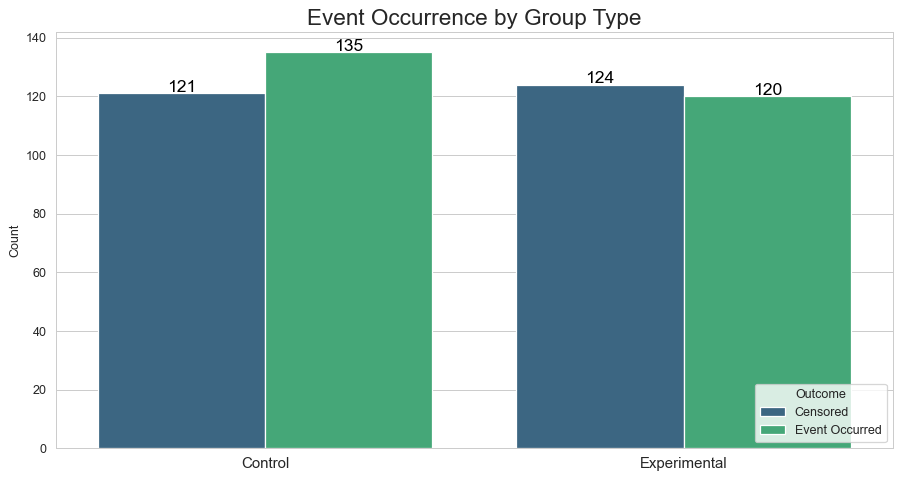

In [151]:
#Group Distribution
groups = mock_data.copy(deep=True)
groups['Group'] = groups['Group'].replace({0:'Experimental', 1:'Control'})
groups['Outcome'] = groups['Outcome'].replace({0:'Censored', 1:'Event Occurred'})

grp_outcome = groups.groupby(['Group', 'Outcome']).size().reset_index(name='Count')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6), dpi=90)
bar_plot = sns.barplot(x='Group', y='Count', hue='Outcome', data=grp_outcome, palette='viridis')

# Add titles and labels
plt.title('Event Occurrence by Group Type', fontsize=18)
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Outcome', loc="lower right")
plt.xticks(fontsize=12)

# Add count annotations to the bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{int(height)}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Show the plot
plt.show()

## Follow-Up Time by Group

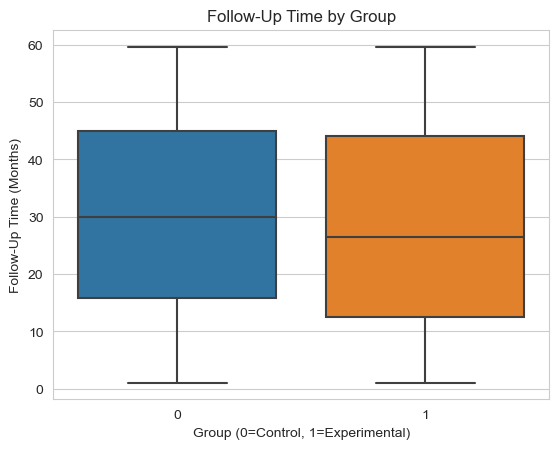

In [152]:
# Comparisoon of Follow-Up Time by Group

sns.boxplot(x='Group', y='FollowUpTime', data=mock_data)
plt.title('Follow-Up Time by Group')
plt.xlabel('Group (0=Control, 1=Experimental)')
plt.ylabel('Follow-Up Time (Months)')
plt.show()

## Covariates

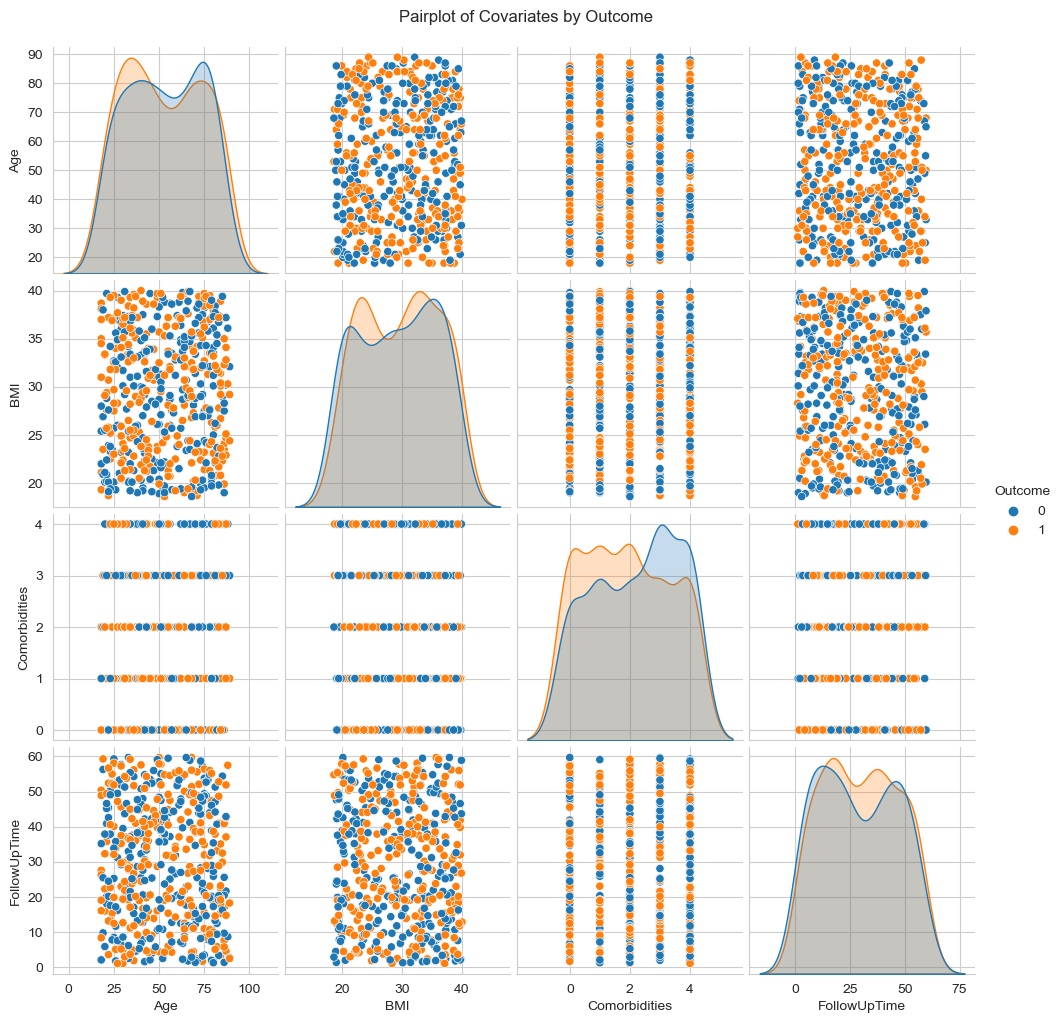

In [224]:
# Covariates

# Suppress specific FutureWarnings related to Seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn._oldcore')
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn.axisgrid')

# Ensure there are no infinite values in the 
mock_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Pairplot to examine relationships
pairplot = sns.pairplot(mock_data[['Age', 'BMI', 'Comorbidities', 'FollowUpTime', 'Outcome']], hue='Outcome')
pairplot.fig.suptitle('Pairplot of Covariates by Outcome', y=1.02)
plt.show()

## Outcomes by Age and BMI

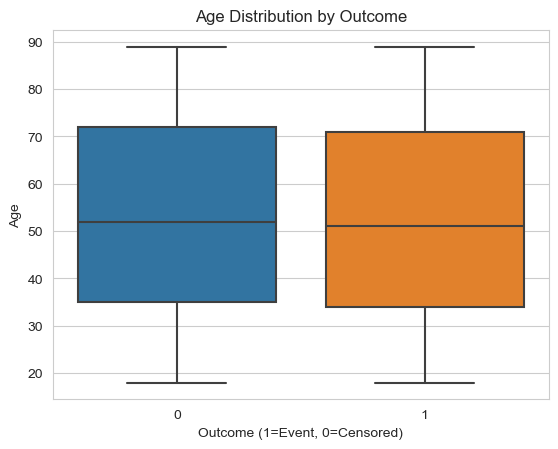

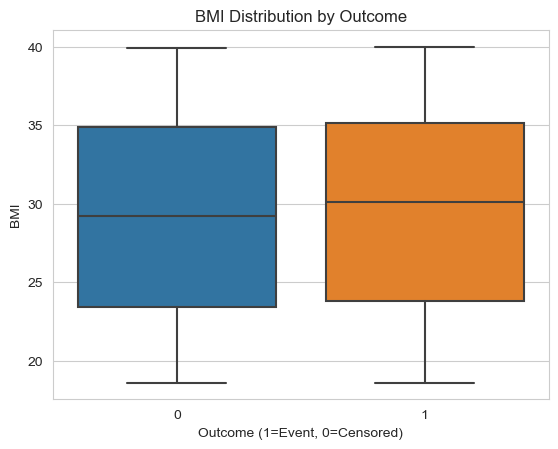

In [210]:
# Distribution of Age by Outcome
sns.boxplot(x='Outcome', y='Age', data=mock_data)
plt.title('Age Distribution by Outcome')
plt.xlabel('Outcome (1=Event, 0=Censored)')
plt.ylabel('Age')
plt.show()

# Distribution of BMI by Outcome
sns.boxplot(x='Outcome', y='BMI', data=mock_data)
plt.title('BMI Distribution by Outcome')
plt.xlabel('Outcome (1=Event, 0=Censored)')
plt.ylabel('BMI')
plt.show()

# Third Step: Survivor Analysis of Experimental and Control Group

## Kaplan-Meier Curves

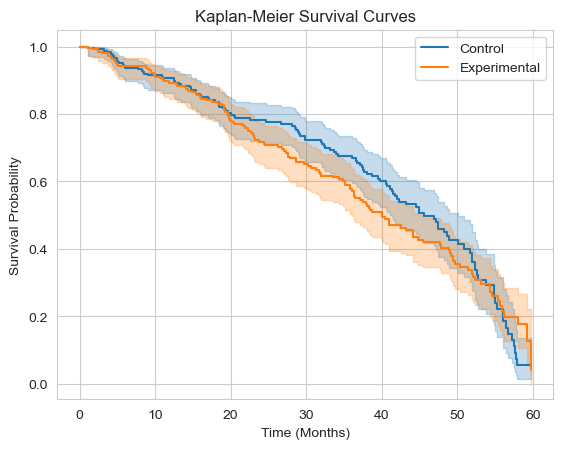

In [155]:
# Kaplan-Meier Curves
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

# Filter data for each group and check if they are empty
control_group = mock_data[mock_data['Group'] == 0]
experimental_group = mock_data[mock_data['Group'] == 1]

# Fit the data for the control group
kmf.fit(control_group['FollowUpTime'], event_observed=control_group['Outcome'], label='Control')
ax = kmf.plot_survival_function()

# Fit the data for the experimental group
kmf.fit(experimental_group['FollowUpTime'], event_observed=experimental_group['Outcome'], label='Experimental')
kmf.plot_survival_function(ax=ax)

plt.title('Kaplan-Meier Survival Curves')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()

## Log-Rank Test

In [156]:
# Statistical Testing: Log-Rank Test
from lifelines.statistics import logrank_test

# Extract survival times and event indicators
control_times = control_group['FollowUpTime']
control_events = control_group['Outcome']
experimental_times = experimental_group['FollowUpTime']
experimental_events = experimental_group['Outcome']

# Perform the log-rank test
results = logrank_test(control_times, experimental_times, event_observed_A=control_events, event_observed_B=experimental_events)

# Print the results
print(results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.42 0.52      0.95


## Cox Proportional Hazards Model: Check for Multicollinearity

In [188]:
# Cox Proportional Hazards Model
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from lifelines import CoxPHFitter

# Opt into future downcasting behavior
pd.set_option('future.no_silent_downcasting', True)

# Combine groups into a single DataFrame with the 'Group' as an additional covariate
combined_data = mock_data
combined_data['Gender'] = combined_data['Gender'].replace({'Male':1, 'Female':2})
combined_data['SmokingStatus'] = combined_data['SmokingStatus'].replace({'Never':0, 'Current':1,'Former':2})
combined_data['PhysicalActivity'] = combined_data['PhysicalActivity'].replace({'Low':1, 'Moderate':1,'High':2})
combined_data['Education'] = combined_data['Education'].replace({'High School':1, 'Bachelor':1,'Master':3, 'PhD':4})
combined_data['RaceEthnicity'] = combined_data['RaceEthnicity'].replace({'White':1, 'Black':2,'Hispanic':3, 'Asian':4, 'Other':5})
combined_data['Income'] = combined_data['Income'].replace({'<30K':1, '30-60K':2,'60-100K':3, '>100K':4})
combined_data['MaritalStatus'] = combined_data['MaritalStatus'].replace({'Single':1, 'Married':2,'Divorced':3, 'Widowed':4})
combined_data['EmploymentStatus'] = combined_data['EmploymentStatus'].replace({'Employed':1, 'Unemployed':2,'Retired':3})
combined_data['Group'] = combined_data['Group'].astype('category')

# Standardize features
X = combined_data.drop(columns=['FollowUpTime', 'Outcome'])
X = sm.add_constant(X)  # adds a constant term to the predictors
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_data = pd.DataFrame(scaled_features, columns=X.columns)
scaled_data['FollowUpTime'] = combined_data['FollowUpTime'].values
scaled_data['Outcome'] = combined_data['Outcome'].values

# Check for multicollinearity
vif = pd.DataFrame()
vif['Feature'] = scaled_data.columns
vif['VIF'] = [variance_inflation_factor(scaled_data.values, i) for i in range(scaled_data.shape[1])]
print(vif)

             Feature       VIF
0              const       NaN
1          PatientID  1.031726
2              Group  1.035117
3                Age  1.032283
4             Gender  1.054207
5                BMI  1.042135
6      BloodPressure  1.020399
7        Cholesterol  1.029551
8            Glucose  1.037837
9      SmokingStatus  1.036154
10  PhysicalActivity  1.053474
11     Comorbidities  1.052314
12       Medications  1.021336
13         Education  1.022416
14     RaceEthnicity  1.048298
15            Income  1.036021
16     MaritalStatus  1.045388
17  EmploymentStatus  1.048011
18      FollowUpTime  1.712549
19           Outcome  1.732979


## Cox Proportional Hazards Model: Check Infinte Values

In [158]:
# Check for NaNs and infinite values -- We know there are none, but good practice. 
print(scaled_data.isna().sum())
print((scaled_data == float('inf')).sum())

const               0
PatientID           0
Group               0
Age                 0
Gender              0
BMI                 0
BloodPressure       0
Cholesterol         0
Glucose             0
SmokingStatus       0
PhysicalActivity    0
Comorbidities       0
Medications         0
Education           0
RaceEthnicity       0
Income              0
MaritalStatus       0
EmploymentStatus    0
FollowUpTime        0
Outcome             0
dtype: int64
const               0
PatientID           0
Group               0
Age                 0
Gender              0
BMI                 0
BloodPressure       0
Cholesterol         0
Glucose             0
SmokingStatus       0
PhysicalActivity    0
Comorbidities       0
Medications         0
Education           0
RaceEthnicity       0
Income              0
MaritalStatus       0
EmploymentStatus    0
FollowUpTime        0
Outcome             0
dtype: int64


## Initialize and fit the Cox Proportional Hazards model

In [159]:
# Initialize and fit the Cox Proportional Hazards model

#Remove variables that express multicollinearity and also those with low variance
scaled_data = scaled_data.drop(columns=['RaceEthnicity', 'Income'])
scaled_data = scaled_data.drop(columns=['const'], errors='ignore')

# Initialize CoxPHFitter with L1 regularization (Lasso)
cph = CoxPHFitter(penalizer=0.1)  # Adjust the penalizer as needed

# Fit the model
cph.fit(scaled_data, duration_col='FollowUpTime', event_col='Outcome', show_progress=True)

# Print the summary
print(cph.summary)

Iteration 1: norm_delta = 2.21e-01, step_size = 0.9500, log_lik = -1327.35045, newton_decrement = 6.82e+00, seconds_since_start = 0.0
Iteration 2: norm_delta = 8.35e-03, step_size = 0.9500, log_lik = -1320.64049, newton_decrement = 1.02e-02, seconds_since_start = 0.0
Iteration 3: norm_delta = 4.24e-04, step_size = 0.9500, log_lik = -1320.63034, newton_decrement = 2.62e-05, seconds_since_start = 0.0
Iteration 4: norm_delta = 2.40e-08, step_size = 1.0000, log_lik = -1320.63032, newton_decrement = 9.53e-14, seconds_since_start = 0.0
Convergence success after 4 iterations.
                      coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                         
PatientID         0.017891   1.018052  0.057673       -0.095147   
Group             0.027470   1.027851  0.059287       -0.088731   
Age               0.021111   1.021336  0.059988       -0.096463   
Gender            0.024839   1.025150  0.059020       -0.090839   
BMI               0.06

# Fourth Step: Model Validation and Sensitiviy Analysis

## Model Validation

In [160]:
# Model Validation
from lifelines.utils import concordance_index
from statsmodels.stats.proportion import proportion_confint

#Schoenfeld Residuals

# Fit the Cox model
cph = CoxPHFitter(penalizer=0.1)
cph.fit(scaled_data, duration_col='FollowUpTime', event_col='Outcome')

# Extract Schoenfeld residuals
residuals = cph.compute_residuals(scaled_data, kind='schoenfeld')
print(residuals.head())

covariate  PatientID     Group       Age    Gender       BMI  BloodPressure  \
289         0.260823  0.939134 -1.131451 -0.970501  1.116561      -0.230472   
442         1.320840 -1.061442 -1.275173  1.031437 -0.260495       1.670712   
189        -0.432768  0.943606  0.979582  1.039508  1.068002      -0.409806   
74         -1.239359 -1.047581 -0.835946  1.039990 -0.783947       1.465723   
56         -1.368195  0.953607  0.836305  1.046399  0.673628      -0.603815   

covariate  Cholesterol   Glucose  SmokingStatus  PhysicalActivity  \
289           1.385313  1.674101      -1.113951          1.223827   
442           0.672464  1.145871       0.108565         -0.862061   
189          -1.461020  1.589793       1.326780          1.223479   
74            0.208752 -1.234285       0.102925          1.231311   
56           -0.871949  1.548478      -1.113243          1.224259   

covariate  Comorbidities  Medications  Education  MaritalStatus  \
289             0.070170     0.967612  -0.9

## Log-Log Survival Plot

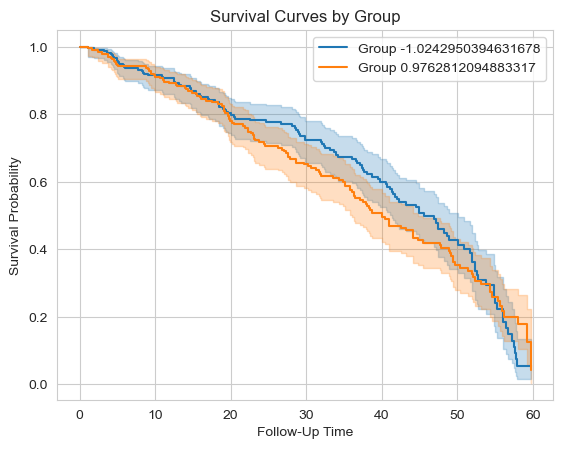

In [162]:
#Log-Log Survival Plot

# Calculate survival functions for a categorical variable
for group in scaled_data['Group'].unique():
    subset = scaled_data[scaled_data['Group'] == group]
    kmf = KaplanMeierFitter()
    kmf.fit(durations=subset['FollowUpTime'], event_observed=subset['Outcome'])
    kmf.plot(label=f'Group {group}')
    
plt.xlabel('Follow-Up Time')
plt.ylabel('Survival Probability')
plt.title('Survival Curves by Group')
plt.legend()
plt.show()

## C-Index

In [163]:
#C-Index

# Calculate C-index
c_index = concordance_index(scaled_data['FollowUpTime'], -cph.predict_partial_hazard(scaled_data), scaled_data['Outcome'])
print(f'C-index: {c_index}')

C-index: 0.5844883799367201


## Residuals Analysis

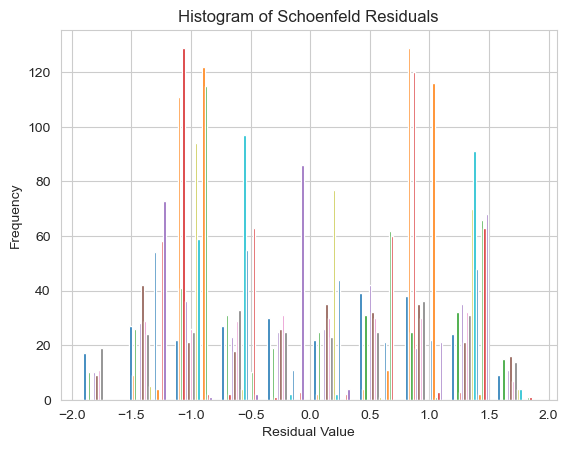

In [164]:
# Residuals Analysis

residuals = cph.compute_residuals(scaled_data, kind='schoenfeld')
plt.hist(residuals)
plt.title('Histogram of Schoenfeld Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

## Sensitiviy Analysis

In [165]:
# Sensitiviy Analysis

# Different Penalizer Values
penalizers = [0.01, 0.1, 1.0]
for penalizer in penalizers:
    cph = CoxPHFitter(penalizer=penalizer)
    cph.fit(scaled_data, duration_col='FollowUpTime', event_col='Outcome')
    print(f'Penalizer: {penalizer}')
    print(cph.summary)

Penalizer: 0.01
                      coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                         
PatientID         0.020774   1.020991  0.062808       -0.102327   
Group             0.031319   1.031815  0.065136       -0.096345   
Age               0.022836   1.023099  0.065818       -0.106165   
Gender            0.030595   1.031067  0.064656       -0.096128   
BMI               0.077610   1.080701  0.065577       -0.050919   
BloodPressure     0.050420   1.051713  0.061929       -0.070959   
Cholesterol      -0.006935   0.993089  0.066006       -0.136306   
Glucose           0.003600   1.003606  0.064876       -0.123554   
SmokingStatus    -0.074992   0.927751  0.060286       -0.193151   
PhysicalActivity  0.150421   1.162323  0.063165        0.026619   
Comorbidities    -0.133983   0.874605  0.064268       -0.259946   
Medications      -0.019462   0.980726  0.062937       -0.142817   
Education         0.058498   1.060243  0.06386

## Model Re-specification with Interaction Terms

In [166]:
# Model Re-specification with Interaction Terms

scaled_data['Age_BMI'] = scaled_data['Age'] * scaled_data['BMI']
cph_interaction = CoxPHFitter(penalizer=0.1)
cph_interaction.fit(scaled_data, duration_col='FollowUpTime', event_col='Outcome')
print(cph_interaction.summary)

                      coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                         
PatientID         0.006291   1.006311  0.058243       -0.107863   
Group             0.018790   1.018967  0.059425       -0.097681   
Age               0.015338   1.015456  0.059972       -0.102205   
Gender            0.013682   1.013776  0.059179       -0.102306   
BMI               0.057375   1.059052  0.059847       -0.059923   
BloodPressure     0.045101   1.046134  0.056953       -0.066524   
Cholesterol       0.003012   1.003017  0.060143       -0.114865   
Glucose          -0.001482   0.998520  0.059106       -0.117327   
SmokingStatus    -0.060968   0.940853  0.055824       -0.170382   
PhysicalActivity  0.123825   1.131818  0.058375        0.009411   
Comorbidities    -0.111560   0.894438  0.058698       -0.226605   
Medications      -0.024089   0.976198  0.058017       -0.137801   
Education         0.039966   1.040775  0.058829       -0.07533

## Outlier Detection

In [190]:
# Add this section after your Cox model fitting and before model validation

# 1. Outlier Detection
# Example: Using Z-scores for numerical variables
from scipy import stats

# Detect outliers
z_scores = np.abs(stats.zscore(combined_data[['Age', 'BMI', 'FollowUpTime']]))
outliers = (z_scores > 3).any(axis=1)

# 2. Fit Cox model with outliers
cph_with_outliers = CoxPHFitter(penalizer=0.1)
cph_with_outliers.fit(combined_data, duration_col='FollowUpTime', event_col='Outcome')

# 3. Fit Cox model without outliers
cph_without_outliers = CoxPHFitter(penalizer=0.1)
cph_without_outliers.fit(combined_data[~outliers], duration_col='FollowUpTime', event_col='Outcome')

# 4. Compare results
print("Model summary with outliers:")
print(cph_with_outliers.summary)

print("\nModel summary without outliers:")
print(cph_without_outliers.summary)

Model summary with outliers:
                      coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                         
PatientID         0.000108   1.000108  0.000398       -0.000673   
Group             0.019433   1.019623  0.119096       -0.213990   
Age               0.001142   1.001143  0.002873       -0.004488   
Gender            0.057489   1.059173  0.119616       -0.176955   
BMI               0.011804   1.011874  0.009323       -0.006469   
BloodPressure     0.002191   1.002193  0.002240       -0.002200   
Cholesterol       0.000086   1.000086  0.001050       -0.001971   
Glucose           0.000105   1.000105  0.001548       -0.002929   
SmokingStatus    -0.078738   0.924283  0.068566       -0.213125   
PhysicalActivity  0.291563   1.338518  0.122328        0.051805   
Comorbidities    -0.082035   0.921240  0.041498       -0.163370   
Medications      -0.028585   0.971820  0.116322       -0.256572   
Education         0.032876   1.03